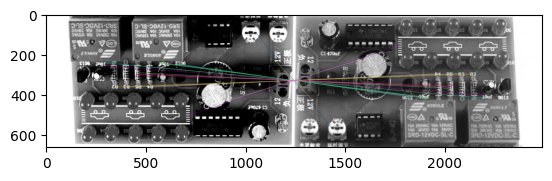

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

def bruthForce():
    folder_path = r'D:\Projects\future_matching\New folder'
    img1path = os.path.join(folder_path, 'img1.JPG')
    img2path = os.path.join(folder_path, 'img2.JPG')
    

    if not os.path.exists(img1path):
        print(f"Error: Image not found at {img1path}")
        return
    if not os.path.exists(img2path):
        print(f"Error: Image not found at {img2path}")
        return
        
    img1 = cv.imread(img1path, cv.IMREAD_GRAYSCALE)
    img2 = cv.imread(img2path, cv.IMREAD_GRAYSCALE)

  
    if img1 is None:
        print(f"Error: Could not load image from {img1path}")
        return
    if img2 is None:
        print(f"Error: Could not load image from {img2path}")
        return

    orb = cv.ORB_create()
    keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

    br = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = br.match(descriptors1, descriptors2)

    matches = sorted(matches, key=lambda x: x.distance)

    nMaches = 20
    imgMatch = cv.drawMatches(img1, keypoints1, img2, keypoints2, matches[:nMaches], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    plt.figure()
    plt.imshow(imgMatch)
    plt.show() # Add plt.show() to display the plot


bruthForce()

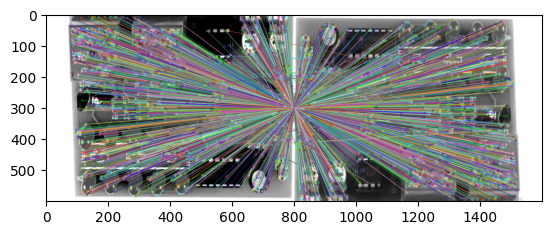

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

def knnBruteForce():
    folder_path = r'D:\Projects\future_matching\New folder'
    img1path = os.path.join(folder_path, 'img1.JPG')
    img2path = os.path.join(folder_path, 'img2.JPG')

    if not os.path.exists(img1path):
        print(f"Error: Image not found at {img1path}")
        return
    if not os.path.exists(img2path):
        print(f"Error: Image not found at {img2path}")
        return

    img1 = cv.imread(img1path, cv.IMREAD_GRAYSCALE)
    img2 = cv.imread(img2path, cv.IMREAD_GRAYSCALE)


    if img1 is None or img2 is None:
        print("Error: Images could not be loaded.")
        return


    height, width = img1.shape[:2]
    # Resize images to a smaller, more manageable size (e.g., 800x600)
    img1 = cv.resize(img1, (800, 600))
    img2 = cv.resize(img2, (800, 600))



    sift = cv.SIFT_create()
    keypoints1, descriptor1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptor2 = sift.detectAndCompute(img2, None)

    bf = cv.BFMatcher()
    nNeighbors = 2
    
    if descriptor1 is None or descriptor2 is None:
        print("Error: Descriptors could not be found. Try different images.")
        return
    
    matches = bf.knnMatch(descriptor1, descriptor2, k=nNeighbors)

    goodMatches = []
    testRatio = 0.75
    for m, n in matches:
        if m.distance < testRatio * n.distance:
            goodMatches.append([m])

    imgMatch = cv.drawMatchesKnn(img1, keypoints1, img2, keypoints2, goodMatches, None,
                                 flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure()
    plt.imshow(imgMatch)
    plt.show()


knnBruteForce()

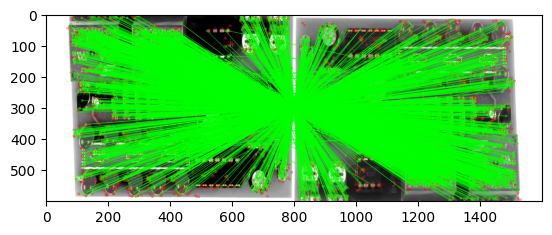

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os



def FLANN():
    folder_path = r'D:\Projects\future_matching\New folder'
    img1path = os.path.join(folder_path, 'img1.JPG')
    img2path = os.path.join(folder_path, 'img2.JPG')

    if not os.path.exists(img1path):
        print(f"Error: Image not found at {img1path}")
        return
    if not os.path.exists(img2path):
        print(f"Error: Image not found at {img2path}")
        return

    img1 = cv.imread(img1path, cv.IMREAD_GRAYSCALE)
    img2 = cv.imread(img2path, cv.IMREAD_GRAYSCALE)

  
    if img1 is None or img2 is None:
        print("Error: Could not load images.")
        return
        
   
    img1 = cv.resize(img1, (800, 600))
    img2 = cv.resize(img2, (800, 600))
    

    sift = cv.SIFT_create()
    keypoints1, descriptor1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptor2 = sift.detectAndCompute(img2, None)

    FLANN_INDEX_KDTREE = 1
    nKDtrees = 5
    nLeafChecks = 50
    nNeighbors = 2
    indexParms = dict(algorithm=FLANN_INDEX_KDTREE, trees=nKDtrees)
    searchParms = dict(checks=nLeafChecks)
    flann = cv.FlannBasedMatcher(indexParms, searchParms)

   
    if descriptor1 is None or descriptor2 is None:
        print("Error: Descriptors could not be found. Try resizing the images further.")
        return

    matches = flann.knnMatch(descriptor1, descriptor2, k=nNeighbors)
    matchMask = [[0, 0] for i in range(len(matches))]
    testRatio = 0.75
    for i, (m, n) in enumerate(matches):
        if m.distance < testRatio * n.distance:
            matchMask[i] = [1, 0]

    drawParams = dict(matchColor=(0, 255, 0),
                      singlePointColor=(255, 0, 0),
                      matchesMask=matchMask,
                      flags=cv.DrawMatchesFlags_DEFAULT)

    imgMatch = cv.drawMatchesKnn(img1, keypoints1, img2, keypoints2, matches, None, **drawParams)
    
    plt.figure()
    plt.imshow(imgMatch)
    plt.show()


FLANN()


Image 1 vs Image 2: 2054 good matches


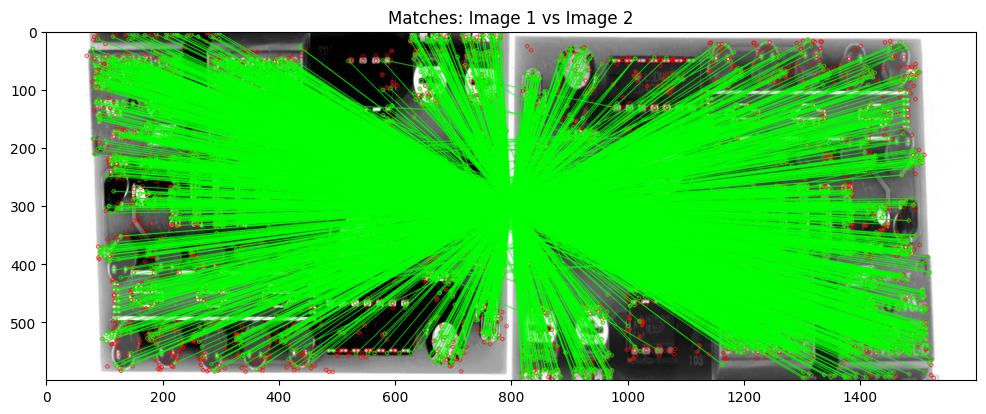

Image 1 vs Image 3: 2646 good matches
Image 1 vs Image 4: 2931 good matches
Image 1 vs Image 5: 390 good matches
Image 2 vs Image 3: 2476 good matches
Image 2 vs Image 4: 2158 good matches
Image 2 vs Image 5: 258 good matches
Image 3 vs Image 4: 2891 good matches
Image 3 vs Image 5: 368 good matches
Image 4 vs Image 5: 396 good matches


In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import os

def multi_image_FLANN():
    folder_path = r"D:\Projects\future_matching\New folder"

    # List of images
    image_files = ["img1.jpg", "img2.jpg", "img3.jpg", "img4.jpg", "img5.jpg"]
    images = []
    
    # Load images
    for f in image_files:
        path = os.path.join(folder_path, f)
        if not os.path.exists(path):
            print(f"Error: {path} not found.")
            return
        img = cv.imread(path, cv.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error: {path} could not be loaded.")
            return
        img = cv.resize(img, (800, 600))
        images.append(img)

    # Initialize SIFT
    sift = cv.SIFT_create()
    keypoints = []
    descriptors = []

    # Extract features
    for img in images:
        kp, des = sift.detectAndCompute(img, None)
        keypoints.append(kp)
        descriptors.append(des)

    # Setup FLANN matcher
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv.FlannBasedMatcher(index_params, search_params)

    # Compare each image with others
    for i in range(len(images)):
        for j in range(i+1, len(images)):
            if descriptors[i] is None or descriptors[j] is None:
                print(f"Skipping comparison {i+1} vs {j+1} (no descriptors)")
                continue

            matches = flann.knnMatch(descriptors[i], descriptors[j], k=2)

            # Lowe's ratio test
            good_matches = []
            for m, n in matches:
                if m.distance < 0.75 * n.distance:
                    good_matches.append(m)

            print(f"Image {i+1} vs Image {j+1}: {len(good_matches)} good matches")

            # Draw matches (optional, show only for first pair)
            if i == 0 and j == 1:  
                img_match = cv.drawMatches(images[i], keypoints[i], 
                                           images[j], keypoints[j], 
                                           good_matches, None,
                                           matchColor=(0, 255, 0),
                                           singlePointColor=(255, 0, 0),
                                           flags=cv.DrawMatchesFlags_DEFAULT)
                plt.figure(figsize=(12, 6))
                plt.title(f"Matches: Image {i+1} vs Image {j+1}")
                plt.imshow(img_match)
                plt.show()

multi_image_FLANN()


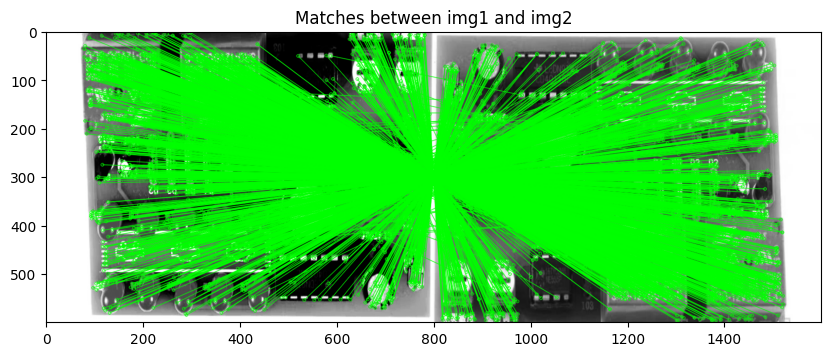

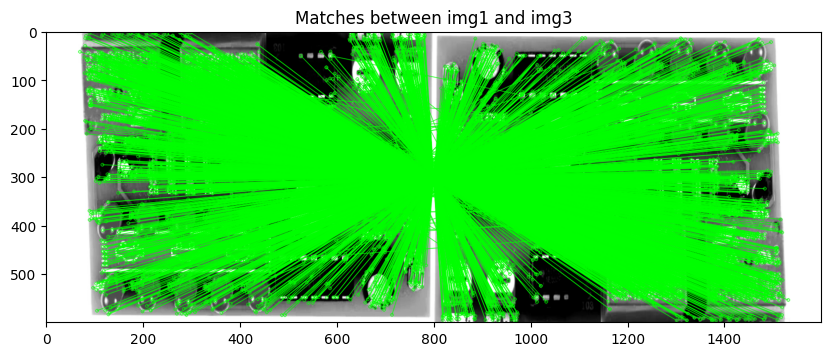

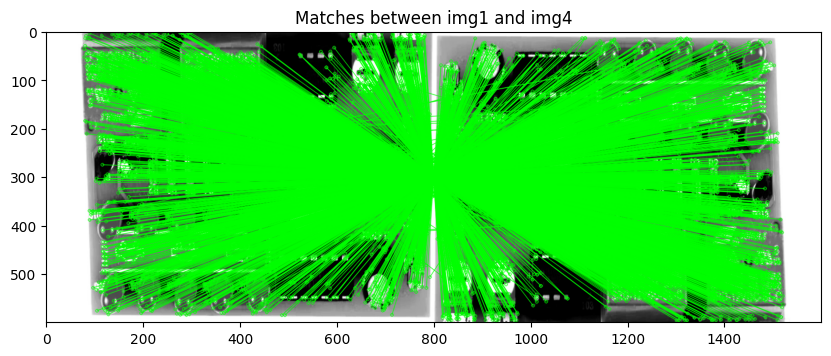

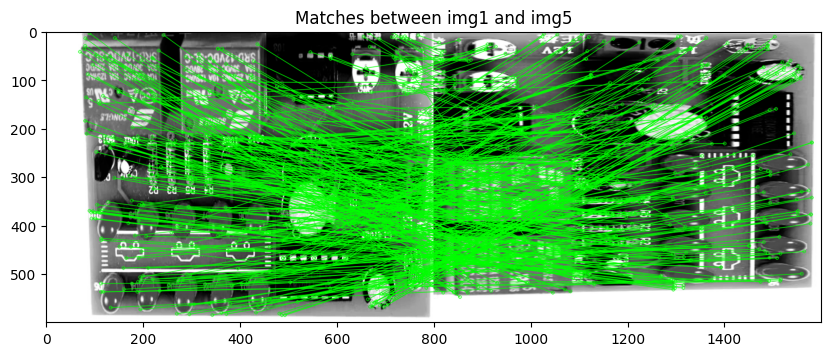

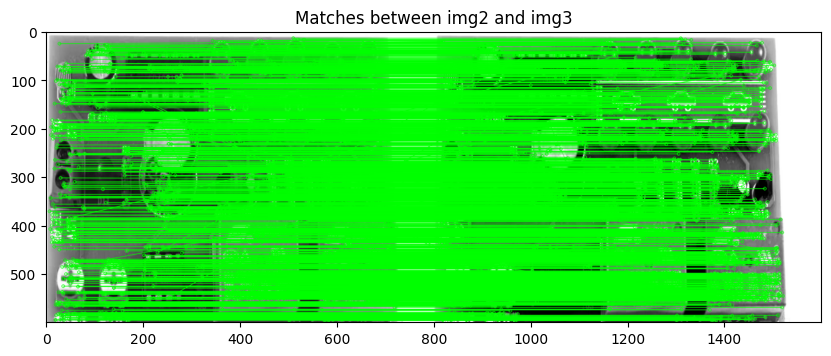

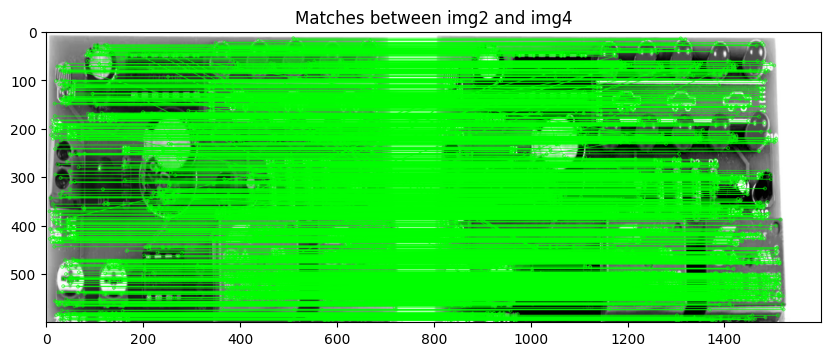

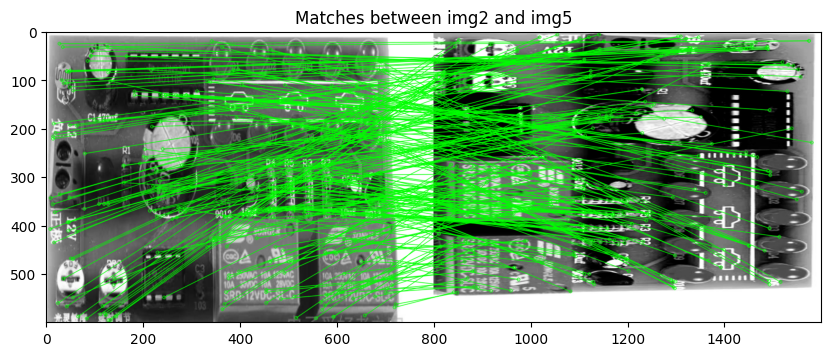

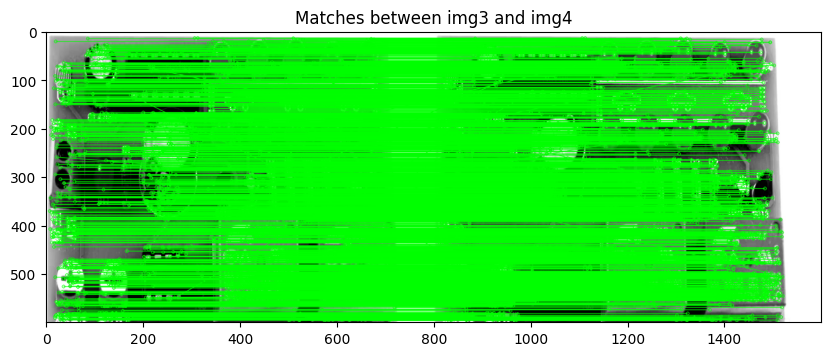

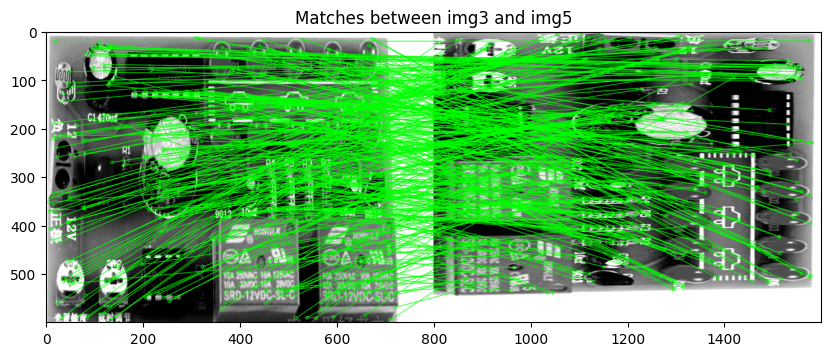

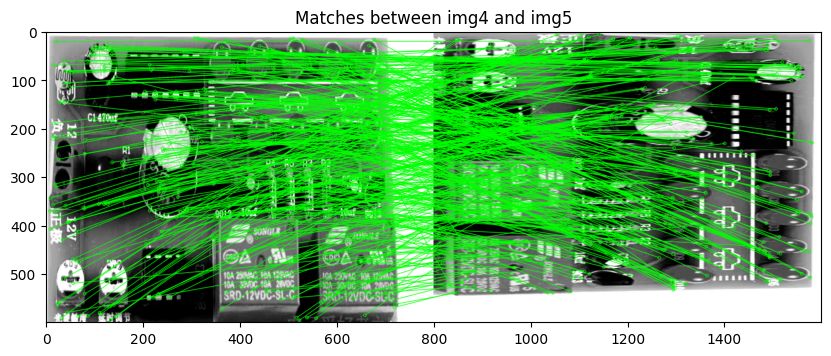


=== Component Registry ===
Component_1: found in ['img1', 'img2'] with 2048 good matches
Component_2: found in ['img1', 'img3'] with 2644 good matches
Component_3: found in ['img1', 'img4'] with 2932 good matches
Component_4: found in ['img1', 'img5'] with 397 good matches
Component_5: found in ['img2', 'img3'] with 2474 good matches
Component_6: found in ['img2', 'img4'] with 2161 good matches
Component_7: found in ['img2', 'img5'] with 258 good matches
Component_8: found in ['img3', 'img4'] with 2894 good matches
Component_9: found in ['img3', 'img5'] with 368 good matches
Component_10: found in ['img4', 'img5'] with 384 good matches


In [5]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

def compare_multiple_images(image_paths):
    # Load all images in grayscale + resize
    images = []
    for path in image_paths:
        img = cv.imread(path, cv.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error loading {path}")
            return
        img = cv.resize(img, (800, 600))
        images.append(img)

    # Create SIFT detector
    sift = cv.SIFT_create()
    keypoints = []
    descriptors = []
    for img in images:
        kp, des = sift.detectAndCompute(img, None)
        keypoints.append(kp)
        descriptors.append(des)

    # FLANN matcher setup
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv.FlannBasedMatcher(index_params, search_params)

    # Registry for unique components
    component_registry = {}
    component_id = 0

    # Compare each image pair
    for i in range(len(images)):
        for j in range(i + 1, len(images)):
            if descriptors[i] is None or descriptors[j] is None:
                continue
            matches = flann.knnMatch(descriptors[i], descriptors[j], k=2)

            # Lowe’s ratio test
            good_matches = []
            for m, n in matches:
                if m.distance < 0.75 * n.distance:
                    good_matches.append(m)

            if good_matches:
                # Register as "same component" across images
                component_id += 1
                component_registry[f"Component_{component_id}"] = {
                    "matches": len(good_matches),
                    "images": [f"img{i+1}", f"img{j+1}"]
                }

                # Draw matches for visualization (optional)
                match_img = cv.drawMatches(images[i], keypoints[i],
                                           images[j], keypoints[j],
                                           good_matches, None,
                                           matchColor=(0, 255, 0),
                                           singlePointColor=(255, 0, 0),
                                           flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
                plt.figure(figsize=(10,5))
                plt.title(f"Matches between img{i+1} and img{j+1}")
                plt.imshow(match_img)
                plt.show()

    return component_registry


# Example usage
folder_path = r"D:\Projects\future_matching\New folder"
image_files = [os.path.join(folder_path, f"img{i}.JPG") for i in range(1, 6)]

registry = compare_multiple_images(image_files)

print("\n=== Component Registry ===")
for comp, info in registry.items():
    print(f"{comp}: found in {info['images']} with {info['matches']} good matches")
